#### [타이타닉 생존자 자료 시각화]

- 생존자 중 성별 비율 시각화
- 나이별 생존자의 성별 비율 비교 시각화

In [67]:
# [1] 모듈 로딩
import pandas as pd
import matplotlib.pyplot as plt

In [68]:
# [2] 데이터 준비
file = r'C:\Users\kdp\KDT_06\KDT\EX_PY06\KDT\EX_PANDAS06\DAY07\titanic.csv'

In [69]:
# [3] CSV ==> DF 저장
dataDF = pd.read_csv(file)

In [70]:
# [4] DF 확인
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


In [71]:
# 분석주제 : 생존자의 성별 분포 / 나이별 성별 분포
# 필요한 데이터 : 성별, 나이, 생존여부 (sex,age, survived)
dataDF = dataDF[['sex','survived','age']]
# 사망자 자료 삭제
dataDF.drop(dataDF.index[dataDF['survived']==0],inplace=True)
dataDF
# 나이 결측치 삭제
dataDF.dropna(inplace=True)
dataDF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 290 entries, 1 to 889
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   sex       290 non-null    object 
 1   survived  290 non-null    int64  
 2   age       290 non-null    float64
dtypes: float64(1), int64(1), object(1)
memory usage: 9.1+ KB


In [72]:
# 연령대 나누기
dataDF['age_range'] = dataDF['age']//10
dataDF['age_range']

1      3.0
2      2.0
3      3.0
8      2.0
9      1.0
      ... 
875    1.0
879    5.0
880    2.0
887    1.0
889    2.0
Name: age_range, Length: 290, dtype: float64

In [73]:
# 연령대 값 : 3.0 ==> 30대
dataDF['age_range'] = dataDF['age_range'].astype('int')

In [74]:
# 성별로 그룹화
group_data = dataDF.groupby('sex')

In [75]:
# 성별 생존자 수 합 리스트로 변경
gender = group_data['survived'].sum().to_list()

<BarContainer object of 2 artists>

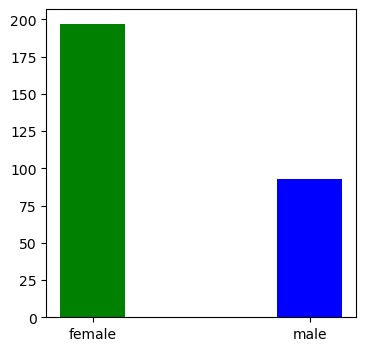

In [76]:
# 그래프 데이터 준비
fig = plt.figure(figsize=(4,4))
xvalue = group_data.groups.keys()
yvalue = gender

plt.bar(xvalue,yvalue,width=0.3,color = ['green','blue'])

In [77]:
# 연령별 생존자 그래프 값
range_a = group_data['age_range'].value_counts().to_dict()
range_a

{('female', 2): 52,
 ('female', 3): 50,
 ('female', 1): 34,
 ('female', 4): 22,
 ('female', 0): 19,
 ('female', 5): 16,
 ('female', 6): 4,
 ('male', 2): 25,
 ('male', 3): 23,
 ('male', 0): 19,
 ('male', 4): 12,
 ('male', 1): 7,
 ('male', 5): 4,
 ('male', 6): 2,
 ('male', 8): 1}

#### [시도별 전출입 인구수 시각화]

- 대구 ===> 타지역으로 이동 인구수 분석 및 시각화 [지역]
- 대구 ===> 타지역으로 이동 인구수 분석 및 시각화 [연도]
- 전국으로 봤을 때 가장 많이 이동이 발생한 지역

In [78]:
# [2] 데이터 준비
filename = r'C:\Users\kdp\KDT_06\KDT\EX_PY06\KDT\EX_PANDAS06\DAY07\시도별 전출입 인구수.xlsx'

In [79]:
# [3] XLSX => DF 저장
popDF = pd.read_excel(filename)
popDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
0,NaN,NaN,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),...,이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명),이동자수 (명)
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [80]:
# 0번행 삭제
popDF.drop(0,inplace=True)
popDF

,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,NaN,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,NaN,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,NaN,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,NaN,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,NaN,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,NaN,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,NaN,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [81]:
# 전출지 결측값 앞의 데이터로 채우기
popDF[popDF.columns[0]].ffill(inplace=True)
popDF

C:\Users\kdp\AppData\Local\Temp\ipykernel_24460\1193077860.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  popDF[popDF.columns[0]].ffill(inplace=True)


,전출지별,전입지별,1970,1971,1972,1973,1974,1975,1976,1977,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
1,전국,전국,4046536,4210164,3687938,4860418,5297969,9011440,6773250,7397623,...,8808256,8487275,8226594,8127195,7506691,7411784,7629098,7755286,7378430,7154226
2,전국,서울특별시,1742813,1671705,1349333,1831858,2050392,3396662,2756510,2893403,...,2025358,1873188,1733015,1721748,1555281,1520090,1573594,1589431,1515602,1472937
3,전국,부산광역시,448577,389797,362202,482061,680984,805979,724664,785117,...,514502,519310,519334,508043,461042,478451,485710,507031,459015,439073
4,전국,대구광역시,-,-,-,-,-,-,-,-,...,409938,398626,370817,370563,348642,351873,350213,351424,328228,321182
5,전국,인천광역시,-,-,-,-,-,-,-,-,...,565585,478169,462051,499567,468666,461613,452297,473223,441646,409465
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,제주특별자치도,전라북도,139,202,141,210,219,415,392,408,...,668,579,672,561,551,516,609,683,733,768
321,제주특별자치도,전라남도,631,965,857,952,1133,2808,2608,2652,...,1143,1123,1002,1026,966,1001,928,1062,1127,1102
322,제주특별자치도,경상북도,374,619,468,576,625,1123,1141,1004,...,761,704,738,756,699,781,728,903,931,994
323,제주특별자치도,경상남도,474,479,440,571,1208,1517,863,1122,...,1517,1474,1324,1367,1227,1278,1223,1500,1448,1501


In [82]:
# 전출지, 전입지로 묶어서 인덱스 설정
popDF = popDF.set_index([popDF.columns[0],popDF.columns[1]])
popDF

1970     1971     1972     1973     1974     1975  \
전출지별    전입지별                                                            
전국      전국       4046536  4210164  3687938  4860418  5297969  9011440   
        서울특별시    1742813  1671705  1349333  1831858  2050392  3396662   
        부산광역시     448577   389797   362202   482061   680984   805979   
        대구광역시          -        -        -        -        -        -   
        인천광역시          -        -        -        -        -        -   
...                  ...      ...      ...      ...      ...      ...   
제주특별자치도 전라북도         139      202      141      210      219      415   
        전라남도         631      965      857      952     1133     2808   
        경상북도         374      619      468      576      625     1123   
        경상남도         474      479      440      571     1208     1517   
        제주특별자치도     9290    12427    12210    16158    19580    34221   

                    1976     1977     1978     1979  ...     2008     2009  \
전출지별    전입지별                                         ...                     
전국      전국       6773250  7397623  8410276  7324380  ...  8808256  8487275   
        서울특별시    2756510  2893403  3307439  2589667  ...  2025358  1873188   
        부산광역시     724664   785117   895337   809483  ...   514502   519310   
        대구광역시          -        -        -        -  ...   409938   398626   
        인천광역시          -        -        -        -  ...   565585   478169   
...                  ...      ...      ...      ...  ...      ...      ...   
제주특별자치도 전라북도         392      408      363      354  ...      668      579   
        전라남도        2608     2652     2722     2178  ...     1143     1123   
        경상북도        1141     1004     1009      818  ...      761      704   
        경상남도         863     1122     1331     1290  ...     1517     1474   
        제주특별자치도    23291    31028    30719    30064  ...    59564    55673   

                    2010     2011     2012     2013     2014     2015  \
전출지별    전입지별                                                            
전국      전국       8226594  8127195  7506691  7411784  7629098  7755286   
        서울특별시    1733015  1721748  1555281  1520090  1573594  1589431   
        부산광역시     519334   508043   461042   478451   485710   507031   
        대구광역시     370817   370563   348642   351873   350213   351424   
        인천광역시     462051   499567   468666   461613   452297   473223   
...                  ...      ...      ...      ...      ...      ...   
제주특별자치도 전라북도         672      561      551      516      609      683   
        전라남도        1002     1026      966     1001      928     1062   
        경상북도         738      756      699      781      728      903   
        경상남도        1324     1367     1227     1278     1223     1500   
        제주특별자치도    55507    59846    54280    60607    59673    59036   

                    2016     2017  
전출지별    전입지별                       
전국      전국       7378430  7154226  
        서울특별시    1515602  1472937  
        부산광역시     459015   439073  
        대구광역시     328228   321182  
        인천광역시     441646   409465  
...                  ...      ...  
제주특별자치도 전라북도         733      768  
        전라남도        1127     1102  
        경상북도         931      994  
        경상남도        1448     1501  
        제주특별자치도    66444    63275  

[324 rows x 48 columns]

In [83]:
# '-' => 0으로 변경
popDF.replace('-','0',inplace=True)

In [84]:
# 결측값 : 0으로 채우기
popDF.fillna(0,inplace=True)

In [85]:
# 타입 변환
popDF = popDF.astype('int64')
popDF.dtypes

1970    int64
1971    int64
1972    int64
1973    int64
1974    int64
1975    int64
1976    int64
1977    int64
1978    int64
1979    int64
1980    int64
1981    int64
1982    int64
1983    int64
1984    int64
1985    int64
1986    int64
1987    int64
1988    int64
1989    int64
1990    int64
1991    int64
1992    int64
1993    int64
1994    int64
1995    int64
1996    int64
1997    int64
1998    int64
1999    int64
2000    int64
2001    int64
2002    int64
2003    int64
2004    int64
2005    int64
2006    int64
2007    int64
2008    int64
2009    int64
2010    int64
2011    int64
2012    int64
2013    int64
2014    int64
2015    int64
2016    int64
2017    int64
dtype: object

In [86]:
# 대구 데이터만 추출
daeguDF = popDF.loc['대구광역시']
daeguDF

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,...,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017
전입지별,,,,,,,,,,,,,,,,,,,,,
전국,0,0,0,0,0,0,0,0,0,0,...,422676,411288,382657,383310,359206,363224,365739,364364,337488,333118
서울특별시,0,0,0,0,0,0,0,0,0,0,...,14824,15469,13915,13310,13838,13673,13735,13038,12802,13011
부산광역시,0,0,0,0,0,0,0,0,0,0,...,5066,5207,5050,4906,5216,5543,6157,5182,4860,4840
대구광역시,0,0,0,0,0,0,0,0,0,0,...,311113,298755,274649,276495,254661,258107,252642,259185,240722,236143
인천광역시,0,0,0,0,0,0,0,0,0,0,...,2125,2003,1968,2000,1979,2202,2015,1987,1962,1930
광주광역시,0,0,0,0,0,0,0,0,0,0,...,563,624,527,577,711,622,902,629,547,515
대전광역시,0,0,0,0,0,0,0,0,0,0,...,2106,2057,1956,2063,2144,2219,2254,2085,1949,1978
울산광역시,0,0,0,0,0,0,0,0,0,0,...,4283,3740,3551,3586,3844,3833,3835,3675,3266,2604
세종특별자치시,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,261,233,526,879,642,827


In [87]:
# 타지역으로 이동 인구수 분석 및 시각화 [지역]
daeguDF.index

Index(['전국', '서울특별시', '부산광역시', '대구광역시', '인천광역시', '광주광역시', '대전광역시', '울산광역시',
       '세종특별자치시', '경기도', '강원도', '충청북도', '충청남도', '전라북도', '전라남도', '경상북도', '경상남도',
       '제주특별자치도'],
      dtype='object', name='전입지별')

In [88]:
# 한글 폰트 설정
from matplotlib import font_manager as fm
from matplotlib import rc
font_file = r'C:\Windows\fonts\malgunsl.ttf'

# 폰트 이름 가져오기
font_name = fm.FontProperties(fname = font_file).get_name()

# 폰트패밀리 이름 지정
rc('font',family = font_name)

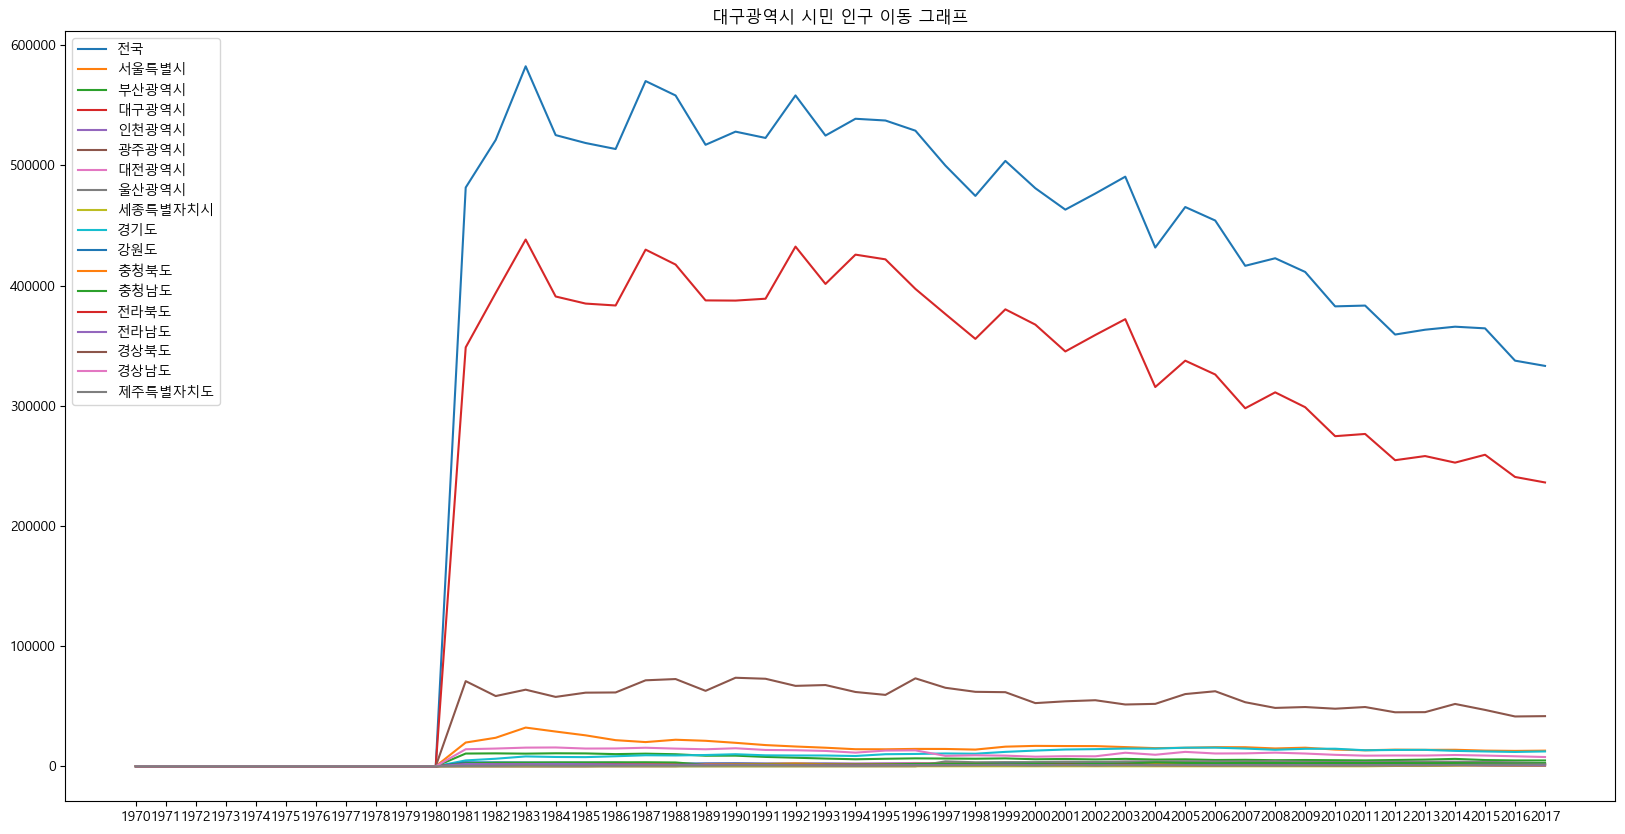

In [92]:
plt.figure(figsize=(20,10))
for i in daeguDF.index:
    plt.plot(daeguDF.columns,daeguDF.loc[i],label = i)

plt.title('대구광역시 시민 인구 이동 그래프')
plt.legend()
plt.show()

In [90]:
# 타지역으로 이동 인구수 분석 및 시각화 [연도]